# Plotting Sea Surface Temperature against Threshold
<br>

This notebook is to get a first feel of how the detection function works. It is run on one point in the Algerian Sea ( 37.5 °N, 3.0°E ) for two different Ensemble Members

In [1]:
import sys
sys.path.insert(0, "/home/jovyan/private-storage/marineHeatWaves")
import marineHeatWaves as mhw

In [2]:
import xarray as xr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
#Open NetCDF file
file_path = "../../Data/Points/Algerie/Point_Algerie001.nc"
point = xr.open_dataset(file_path)
print("data open")
file_path2 = "../../Data/Points/Algerie/Point_Algerie002.nc"
point2 = xr.open_dataset(file_path2)
print("data2 open")

data open
data2 open


In [5]:
dates = point["time_counter"].values
sst = point["sosstsst"].values
sst2 = point2["sosstsst"].values
date1 = np.arange(len(dates)) +1

In [6]:
#On crée un dictionnaire pour pouvoir passer du numéro du jours à la date facilement
Dict_dates = dict(zip(date1, dates))
Dict_dates[1]

np.datetime64('1979-06-27T12:00:00.000000000')

In [25]:
MHW, Clim = mhw.detect(date1, sst)
MHW2, Clim2 = mhw.detect(date1, sst2)
print("There has been ", MHW["n_events"], "events on that point for the first member")
print("There has been ", MHW2["n_events"], "events on that point for the second member")

There has been  61 events on that point for the first member
There has been  60 events on that point for the second member


In [8]:
#On remplace les datetime en nombre de jours par leur date dans "date_start" et "date_end"
for i in range(MHW["n_events"]) :
    MHW["date_start"][i] = Dict_dates[MHW["time_start"][i]]
    MHW["date_end"][i] = Dict_dates[MHW["time_end"][i]]
    print(i+1, end = "\r")

#Même chose pour le deuxième membre
for i in range(MHW2["n_events"]) :
    MHW2["date_start"][i] = Dict_dates[MHW2["time_start"][i]]
    MHW2["date_end"][i] = Dict_dates[MHW2["time_end"][i]]
    print(i+1, end = "\r")

60

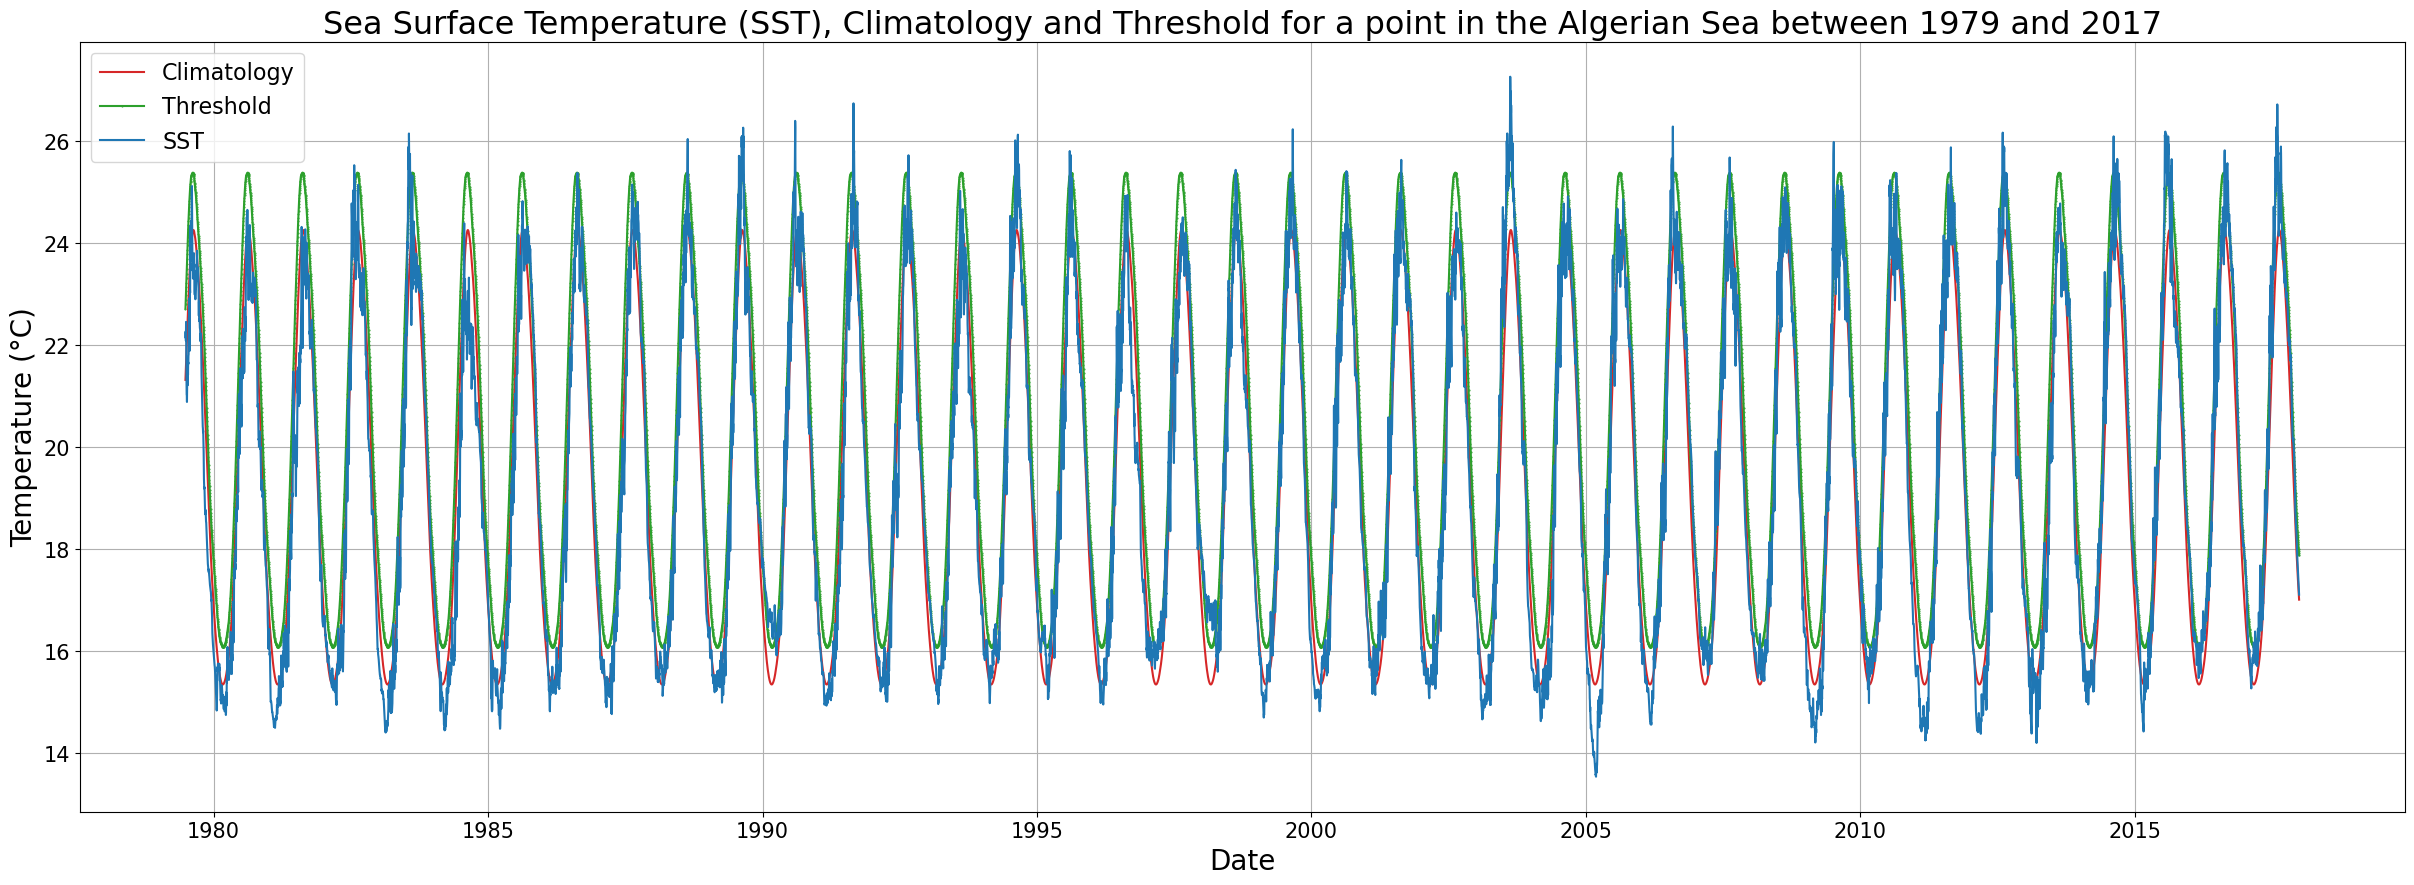

In [24]:
fig, ax1 = plt.subplots(figsize = (30, 10))

color = 'tab:red'
ax1.set_xlabel('Date', size = 20)
p1, = ax1.plot(dates,Clim["seas"], color=color, label = "Climatology")
ax1.tick_params(axis='y')

color = 'tab:green'
p2, = ax1.plot(dates,Clim["thresh"], color=color, label = "Threshold", marker = ".", markersize = 1)
ax1.tick_params(axis='y')

color = 'tab:blue'
p3, = ax1.plot(dates,sst, color=color, label = "SST")
ax1.tick_params(axis='y')
ax1.set_ylabel('Temperature (°C)', size = 20)
ax1.grid()

ax1.tick_params(axis = "both", labelsize = 15)
ax1.legend(handles = [p1,p2,p3], fontsize = 16)
plt.title("Sea Surface Temperature (SST), Climatology and Threshold for a point in the Algerian Sea between 1979 and 2017", size = 23)
plt.show()

This plot show the SST, Climatology and 90-percentile for the whole study period for the first ensemble member

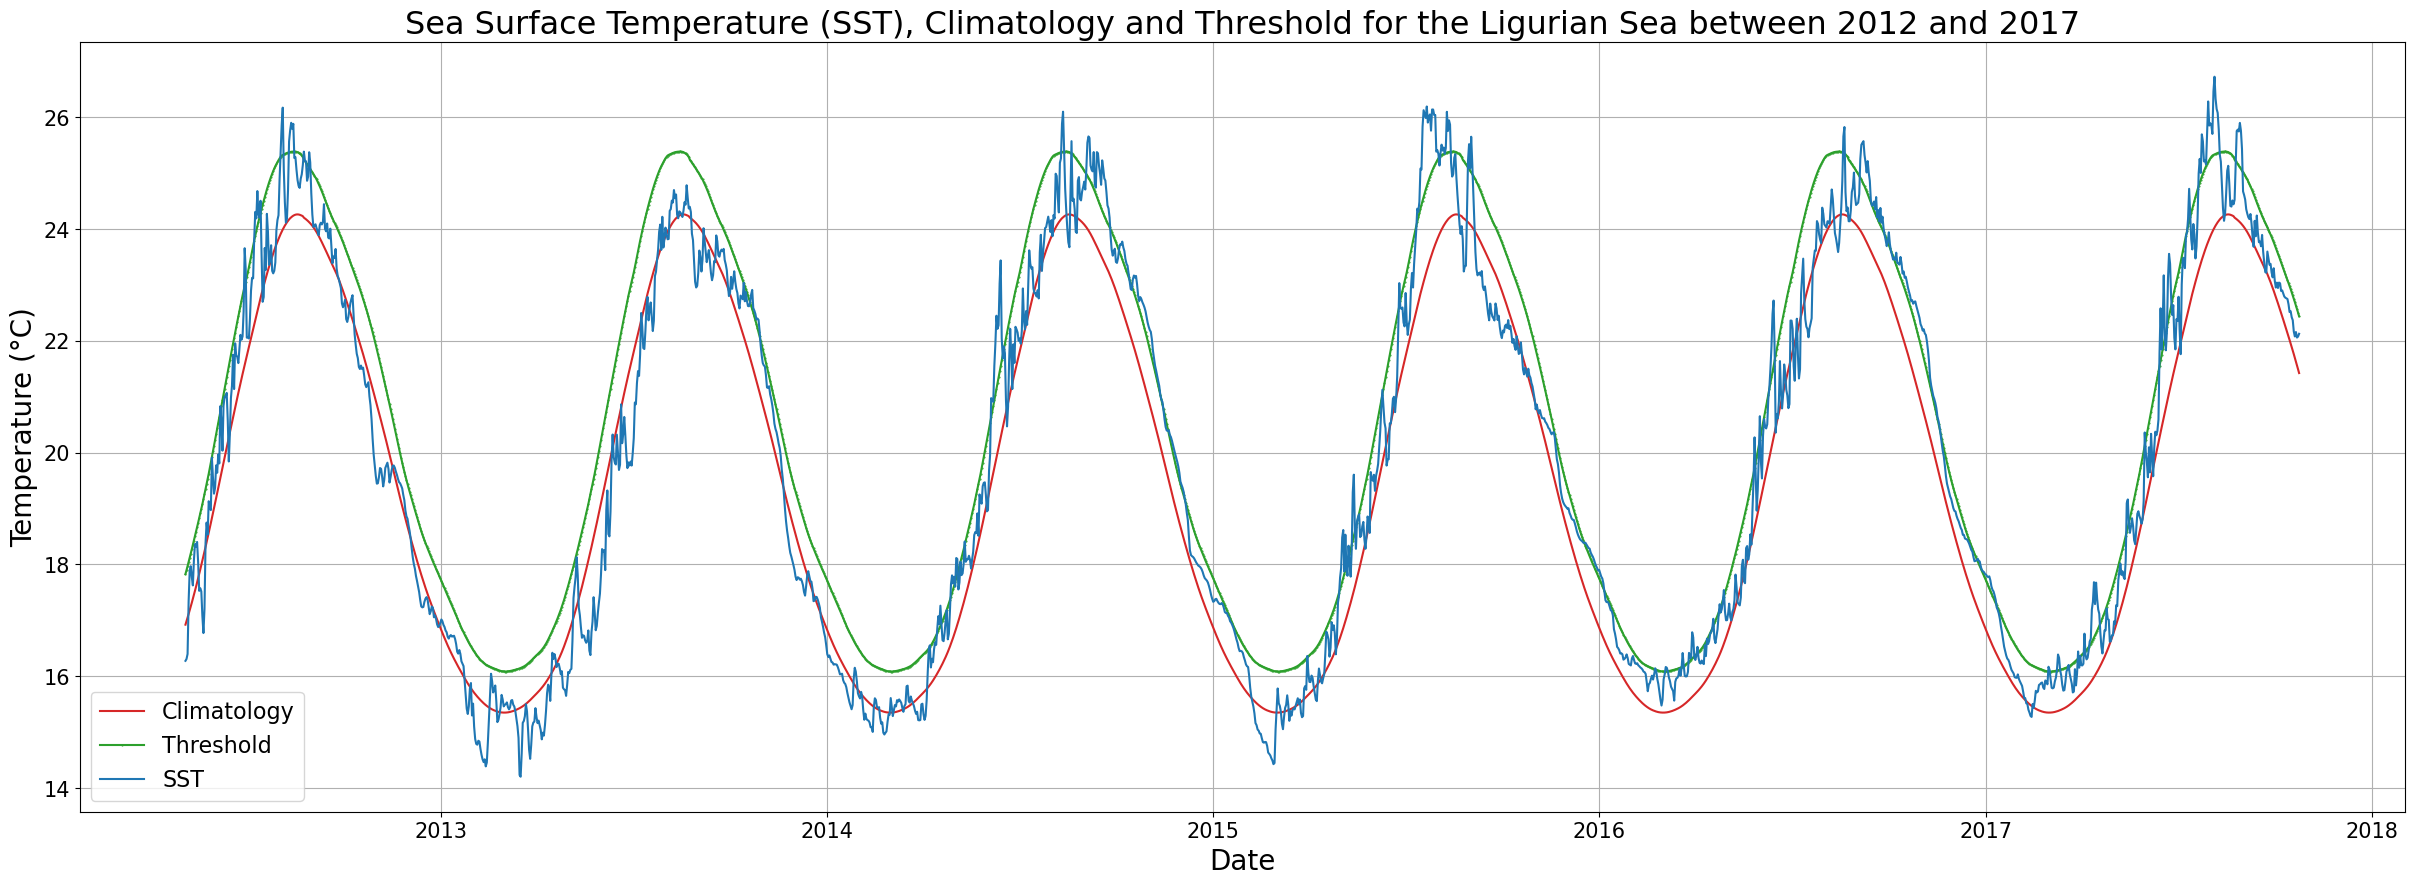

In [22]:
fig, ax1 = plt.subplots(figsize = (30, 10))

color = 'tab:red'
ax1.set_xlabel('Date', size = 20)
p1, = ax1.plot(dates[12000:14000], Clim["seas"][12000:14000], color=color, label = "Climatology")
ax1.tick_params(axis='y')

color = 'tab:green'
p2, = ax1.plot(dates[12000:14000], Clim["thresh"][12000:14000], color=color, label = "Threshold", marker = ".", markersize = 1)
ax1.tick_params(axis='y')

color = 'tab:blue'
p3, = ax1.plot(dates[12000:14000], sst[12000:14000], color=color, label = "SST")
ax1.tick_params(axis='y')
ax1.set_ylabel('Temperature (°C)', size = 20)
ax1.grid()

ax1.tick_params(axis='both', labelsize = 15)
ax1.legend(handles = [p1,p2,p3], fontsize = 16)
plt.title("Sea Surface Temperature (SST), Climatology and Threshold for the Ligurian Sea between 2012 and 2017", size = 23)
plt.show()